In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Public/data science project/customer segmentation/Mall_Customers.csv.xls')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
 <a list of 51 Text major ticklabel objects>)

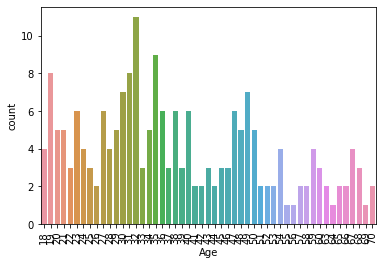

In [ ]:
sns.countplot(data = df, x = 'Age')
plt.xticks(rotation=90)

In [ ]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


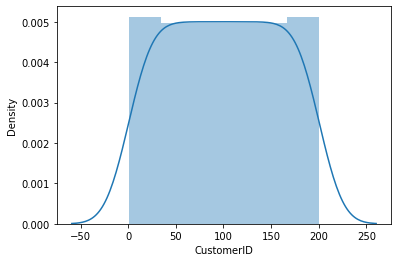

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


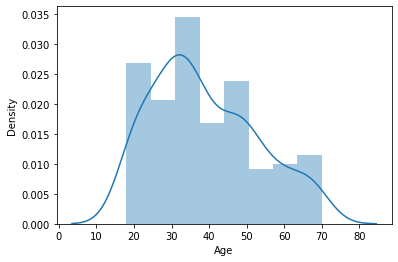

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


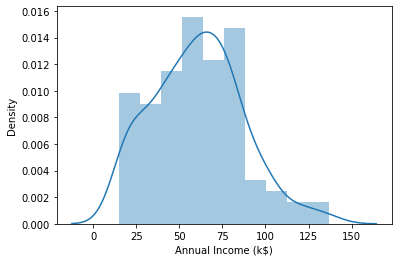

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


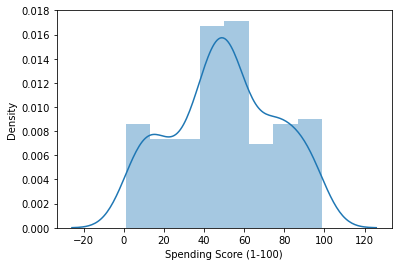

In [ ]:
for i in df.columns:
  if i != 'Gender':
    sns.distplot(df[i])
    plt.show()

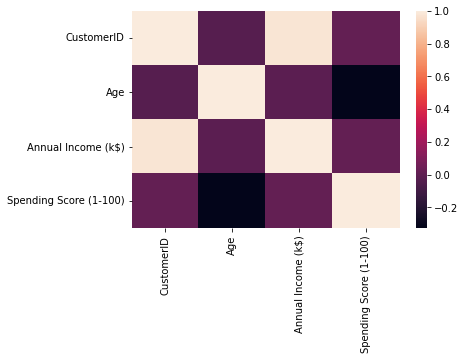

In [ ]:
corr = df.corr()
sns.heatmap(corr)

As we see on coorelation map, there is no correlation between our features. except costumerID and Annual Income that I think it's not important because costumerID has no information.


In [ ]:
df['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

##Detecting Outliers:?

Text(0, 0.5, 'Annual Income (k$)')

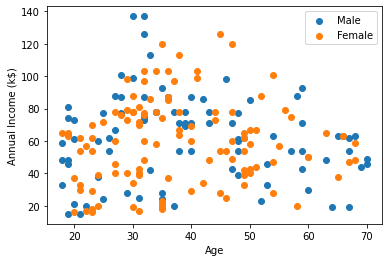

In [ ]:
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Age' , y = 'Annual Income (k$)' , data = df[df['Gender'] == gender], label = gender)
plt.legend()
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')


As I can't see any specific cluster for data I shoud try more way to see if there is any clustering for data.
(From the above diagram, we can see that cluster separation isn't too great.)

Text(0, 0.5, 'Annual Income (k$)')

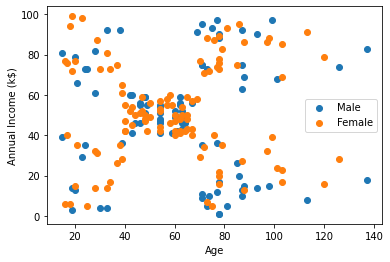

In [ ]:
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Annual Income (k$)',y = 'Spending Score (1-100)' , data = df[df['Gender'] == gender], label = gender)
plt.legend()
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')

##Clustering using K-means

###1.Segmentation using Age and Spending Score.

In [ ]:
X_K = df[['Age' , 'Spending Score (1-100)']].iloc[: , :].values

In [ ]:
from sklearn.cluster import KMeans
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++' , algorithm='elkan') )
    algorithm.fit(X_K)
    inertia.append(algorithm.inertia_)

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:965: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'full' instead.
  warnings.warn(


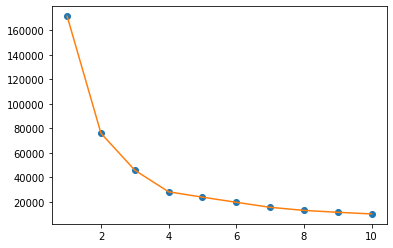

In [ ]:
##plot
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-')

According to the Elbow graph we deterrmine the clusters number, the best number of clustering for this dataset is 4!

In [ ]:
algorithm = KMeans(n_clusters = 4 ,init='k-means++' , algorithm='elkan')

y_kmeans = algorithm.fit(X_K)


In [ ]:
y_kmeans = algorithm.fit_predict(X_K)

In [ ]:
y_kmeans[0]

2

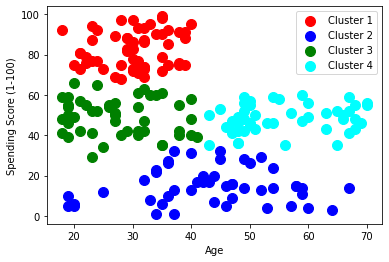

In [ ]:
#6 Visualising the clusters
plt.scatter(X_K[y_kmeans==0, 0], X_K[y_kmeans==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X_K[y_kmeans==1, 0], X_K[y_kmeans==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X_K[y_kmeans==2, 0], X_K[y_kmeans==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(X_K[y_kmeans==3, 0], X_K[y_kmeans==3, 1], s=100, c='cyan', label ='Cluster 4')

plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()

cluster 2 is included by who spend alot and they are young too!
cluster 4 is about who spend in middle and they are elder.
cluster 1 include people by low spending score that most of them are older than 35.
and cluster 3 is about who is young and spend a lot.

##Segmentation using Annual Income and Spending Score

In [ ]:
X2 = df[['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X2)
    inertia.append(algorithm.inertia_)

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:965: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'full' instead.
  warnings.warn(


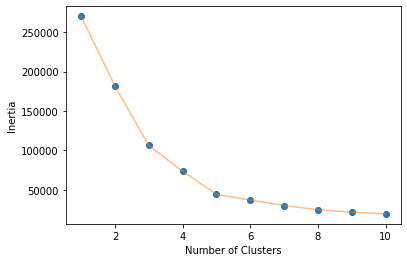

In [ ]:
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

###the best number of cluster is 5!

In [ ]:
algorithm = (KMeans(n_clusters = 5 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X2)
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

In [ ]:
h = 0.02
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z2 = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

In [ ]:
# plt.figure(1 , figsize = (15 , 7) )
# plt.clf()
# Z2 = Z2.reshape(xx.shape)
# plt.imshow(Z2 , interpolation='nearest', 
#            extent=(xx.min(), xx.max(), yy.min(), yy.max()),
#            cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

# plt.scatter( x = 'Annual Income (k$)' ,y = 'Spending Score (1-100)' , data = df , c = labels2 , s = 200 )
# plt.scatter(x = centroids2[: , 0] , y =  centroids2[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
# plt.ylabel('Spending Score (1-100)') , plt.xlabel('Annual Income (k$)')
# plt.show()